# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'Data\cleaned_hangmu.csv'
df = pd.read_csv(path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             1529 non-null   int64  
 1   text                1529 non-null   object 
 2   shared_text         1529 non-null   object 
 3   time                1529 non-null   object 
 4   images_description  1529 non-null   object 
 5   video_id            261 non-null    float64
 6   likes               1529 non-null   int64  
 7   comments            1529 non-null   int64  
 8   shares              1529 non-null   int64  
 9   user_id             1529 non-null   int64  
 10  username            1529 non-null   object 
 11  is_live             1529 non-null   bool   
 12  available           1529 non-null   bool   
 13  comments_full       1529 non-null   object 
 14  reaction_count      1529 non-null   int64  
 15  with                1440 non-null   object 
 16  page_i

# **Data analysis**

# **1. Đâu là bài viết có lượt tương tác lớn nhất**

In [5]:
df.head()

,post_id,text,shared_text,time,images_description,video_id,likes,comments,shares,user_id,username,is_live,available,comments_full,reaction_count,with,page_id,was_live,header
0,1432619150570316,Tất cả anh em trong hang chú ý!!!!,,2022-09-05 00:36:39,[],7.748442e+14,728,134,0,100016993770190,Nguyễn Bát Man,False,True,[],728,"[{'name': 'Hang MU', 'link': 'https://m.facebo...",1.076085e+14,False,Nguyễn Bát Man‎Hang MU
1,1709707086194853,"1 năm rồi đấy, nhanh thật",,2023-11-13 22:32:37,"['Có thể là hình ảnh về 2 người, bộ vét và tro...",NaN,360,26,0,100005247039084,Thinh Pham,False,True,[],360,"[{'name': 'Hang MU', 'link': 'https://m.facebo...",NaN,False,Thinh Pham‎Hang MU
2,1707877613044467,Trong hang chán quá nên nghịch 1 tí 🤣 Chờ ngày...,,2023-11-10 18:58:31,[],1.002498e+15,481,25,0,100089869466307,Văn Hùng Hà,False,True,[],481,"[{'name': 'Hang MU', 'link': 'https://m.facebo...",NaN,False,Văn Hùng Hà‎Hang MU
3,1710030909495804,Ảo Malaysia :)))),,2023-11-14 14:58:43,"[""Có thể là hình ảnh về 6 người, mọi người đan...",NaN,65,9,0,100012623049308,Nguyễn Đào Nguyên,False,True,[],65,"[{'name': 'Hang MU', 'link': 'https://m.facebo...",NaN,False,Nguyễn Đào Nguyên‎Hang MU
4,1709810706184491,1. David Moyse: tạt tạt tạt tạt => không bài v...,,2023-11-14 03:16:23,"['Có thể là hình ảnh về 1 người, đang chơi bón...",NaN,170,24,0,358460312962600,Hang MU,False,True,[],170,NaN,NaN,False,NaN


In [6]:
df['total_interaction'] = df['reaction_count'] + df['comments'] + df['shares']
highest_interaction_post = df.loc[df['total_interaction'] == df['total_interaction'].max()]

In [7]:
highest_interaction_post

,post_id,text,shared_text,time,images_description,video_id,likes,comments,shares,user_id,username,is_live,available,comments_full,reaction_count,with,page_id,was_live,header,total_interaction
203,1643230736175822,MU mua thủ môn kiêm trung vệ Onana về kèm Hà L...,,2023-07-17 04:56:56,[],2.284253e+14,69967,666,0,100006359101453,Phạm Xuân Thùy,False,True,[],69967,"[{'name': 'Hang MU', 'link': 'https://m.facebo...",NaN,False,Phạm Xuân Thùy‎Hang MU,70633


In [8]:
highest_interaction_post[['post_id', 'text', 'time', 'total_interaction']]

,post_id,text,time,total_interaction
203,1643230736175822,MU mua thủ môn kiêm trung vệ Onana về kèm Hà L...,2023-07-17 04:56:56,70633


<Axes: xlabel='n-th highest interacted post', ylabel='Total interaction'>

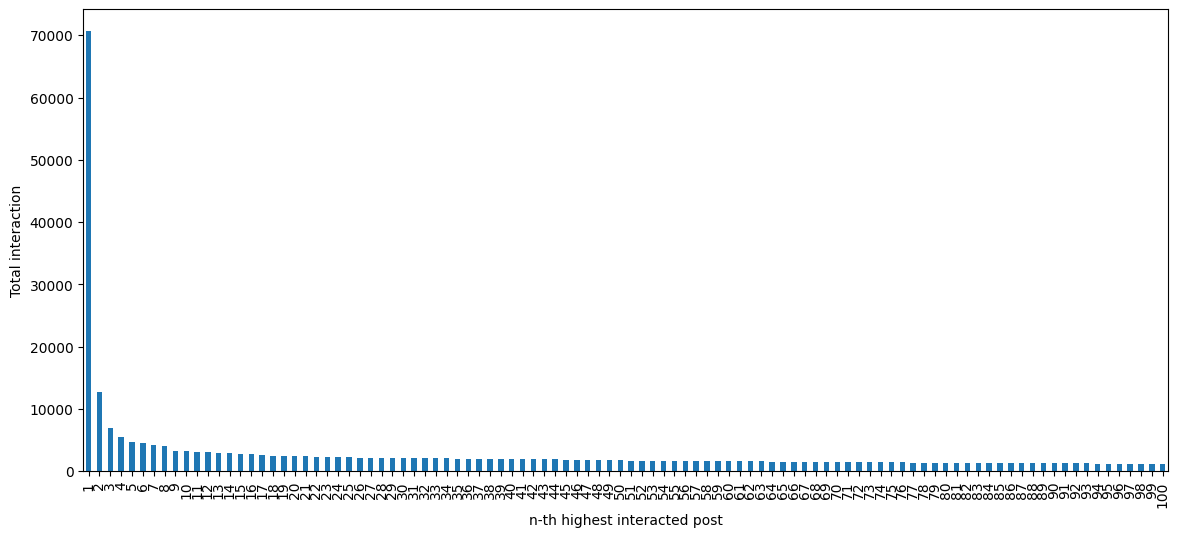

In [9]:
most_100 = df['total_interaction'].sort_values(ascending= False)[:100]
most_100.index = map(int, np.linspace(1, 100, 100))
most_100.plot(kind= 'bar', figsize= (14, 6), ylabel= 'Total interaction', xlabel= 'n-th highest interacted post')


## **2. Mức độ tương tác của nhóm thay đổi như thế nào theo thời gian**

In [10]:
df['time'] = pd.to_datetime(df['time'])

In [11]:
df['month_year'] = df['time'].dt.to_period('M')
df['month_year']

0       2022-09
1       2023-11
2       2023-11
3       2023-11
4       2023-11
         ...   
1524    2023-08
1525    2023-08
1526    2023-08
1527    2023-08
1528    2023-08
Name: month_year, Length: 1529, dtype: period[M]

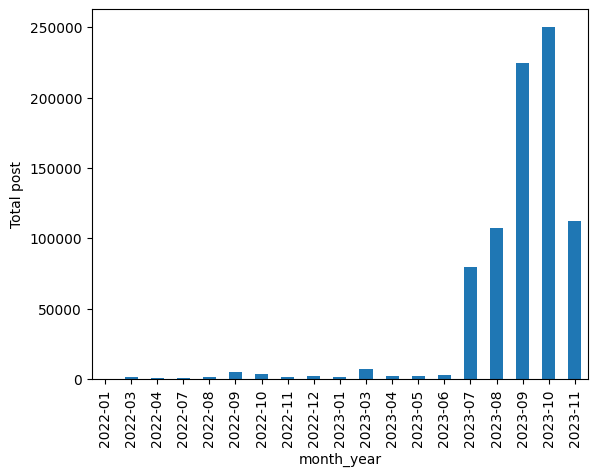

In [12]:
plot = df.groupby('month_year')['total_interaction'].sum().plot(kind= 'bar', ylabel= 'Total post')


## **3. Các mốc thời gian trong ngày mà nhóm thường đăng bài viết**

In [13]:
df['hour'] = df['time'].dt.hour


In [14]:

plot_data = df['hour'].value_counts().sort_index()
mean = df['hour'].value_counts().mean() * np.ones(len(plot_data))

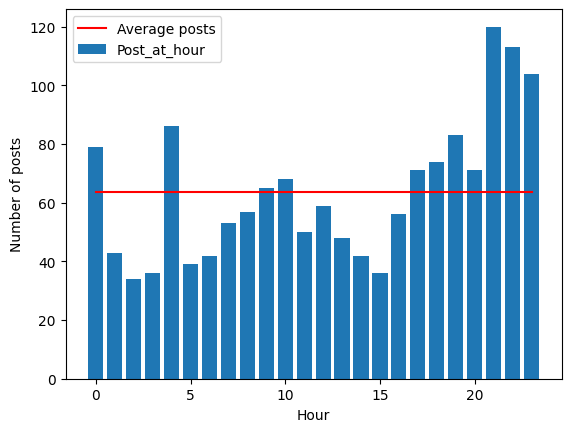

In [15]:
plt.bar(plot_data.index, plot_data.values, label= 'Post_at_hour')
plt.plot(plot_data.index, mean, color = 'red', label= 'Average posts')
plt.legend()
plt.ylabel('Number of posts')
plt.xlabel('Hour')
plt.show()


## **4. Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?**

In [16]:
df['text']
all_text = df['text'].str.split()

In [17]:
# tạo list chứa tất cả các từ đơn
cleaned_words = []
for i in all_text:
    try:
        # print(text)
        cleaned_words.extend(i)
    except Exception:
        continue
        
cleaned_words

['Tất',
 'cả',
 'anh',
 'em',
 'trong',
 'hang',
 'chú',
 'ý!!!!',
 '1',
 'năm',
 'rồi',
 'đấy,',
 'nhanh',
 'thật',
 'Trong',
 'hang',
 'chán',
 'quá',
 'nên',
 'nghịch',
 '1',
 'tí',
 '🤣',
 'Chờ',
 'ngày',
 'ra',
 'ngoài',
 'hóng',
 'nắng',
 '🔴🟡',
 'Ảo',
 'Malaysia',
 ':))))',
 '1.',
 'David',
 'Moyse:',
 'tạt',
 'tạt',
 'tạt',
 'tạt',
 '=>',
 'không',
 'bài',
 'vở',
 'gì',
 '2.',
 'Van',
 'Gaal:',
 'chuyền',
 'qua',
 'chuyền',
 'lại',
 '=>',
 'không',
 'bài',
 'vở',
 'gì',
 '3.',
 'Mourinho:',
 'thực',
 'dụng,',
 'cá',
 'tính',
 'mạnh,',
 'không',
 'dung',
 'hoà',
 'được',
 'đội',
 'bóng',
 '=>',
 'không',
 'bài',
 'vở',
 'gì',
 '4.',
 'Ole:',
 'hiềnXem',
 'thêm',
 'quá,thay',
 'người',
 'chậm,',
 'không',
 'tiếng',
 'nói',
 '=>',
 'không',
 'bài',
 'vở',
 'gì',
 '5.',
 'Ten',
 'Hag:',
 'gần',
 'đây',
 'cũng',
 'bị',
 'chê',
 'không',
 'bài',
 'vở',
 'gì',
 'Bài',
 'ca',
 'không',
 'bài',
 'vở',
 'gì',
 'được',
 'truyền',
 'từ',
 'một',
 'số',
 'bộ',
 'phận',
 'CĐV',
 'thời',
 'trướ

In [18]:
#tạo dict đếm các từ và sắp xếp chọn ra 10 từ xuất hiện nhiều nhất
word_counts = {}
for word in cleaned_words:
    word_counts[word] = word_counts.get(word, 0) + 1

top_10_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

#in 10 từ xuất hiện nhiều nhất
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")


Top 10 words:
có: 570
là: 563
của: 524
không: 373
trận: 364
thì: 361
và: 352
này: 316
MU: 310
lại: 306


In [19]:
df_text = df[['post_id','text']]
text    = str(df_text['text'])


(-0.5, 1999.5, 1199.5, -0.5)

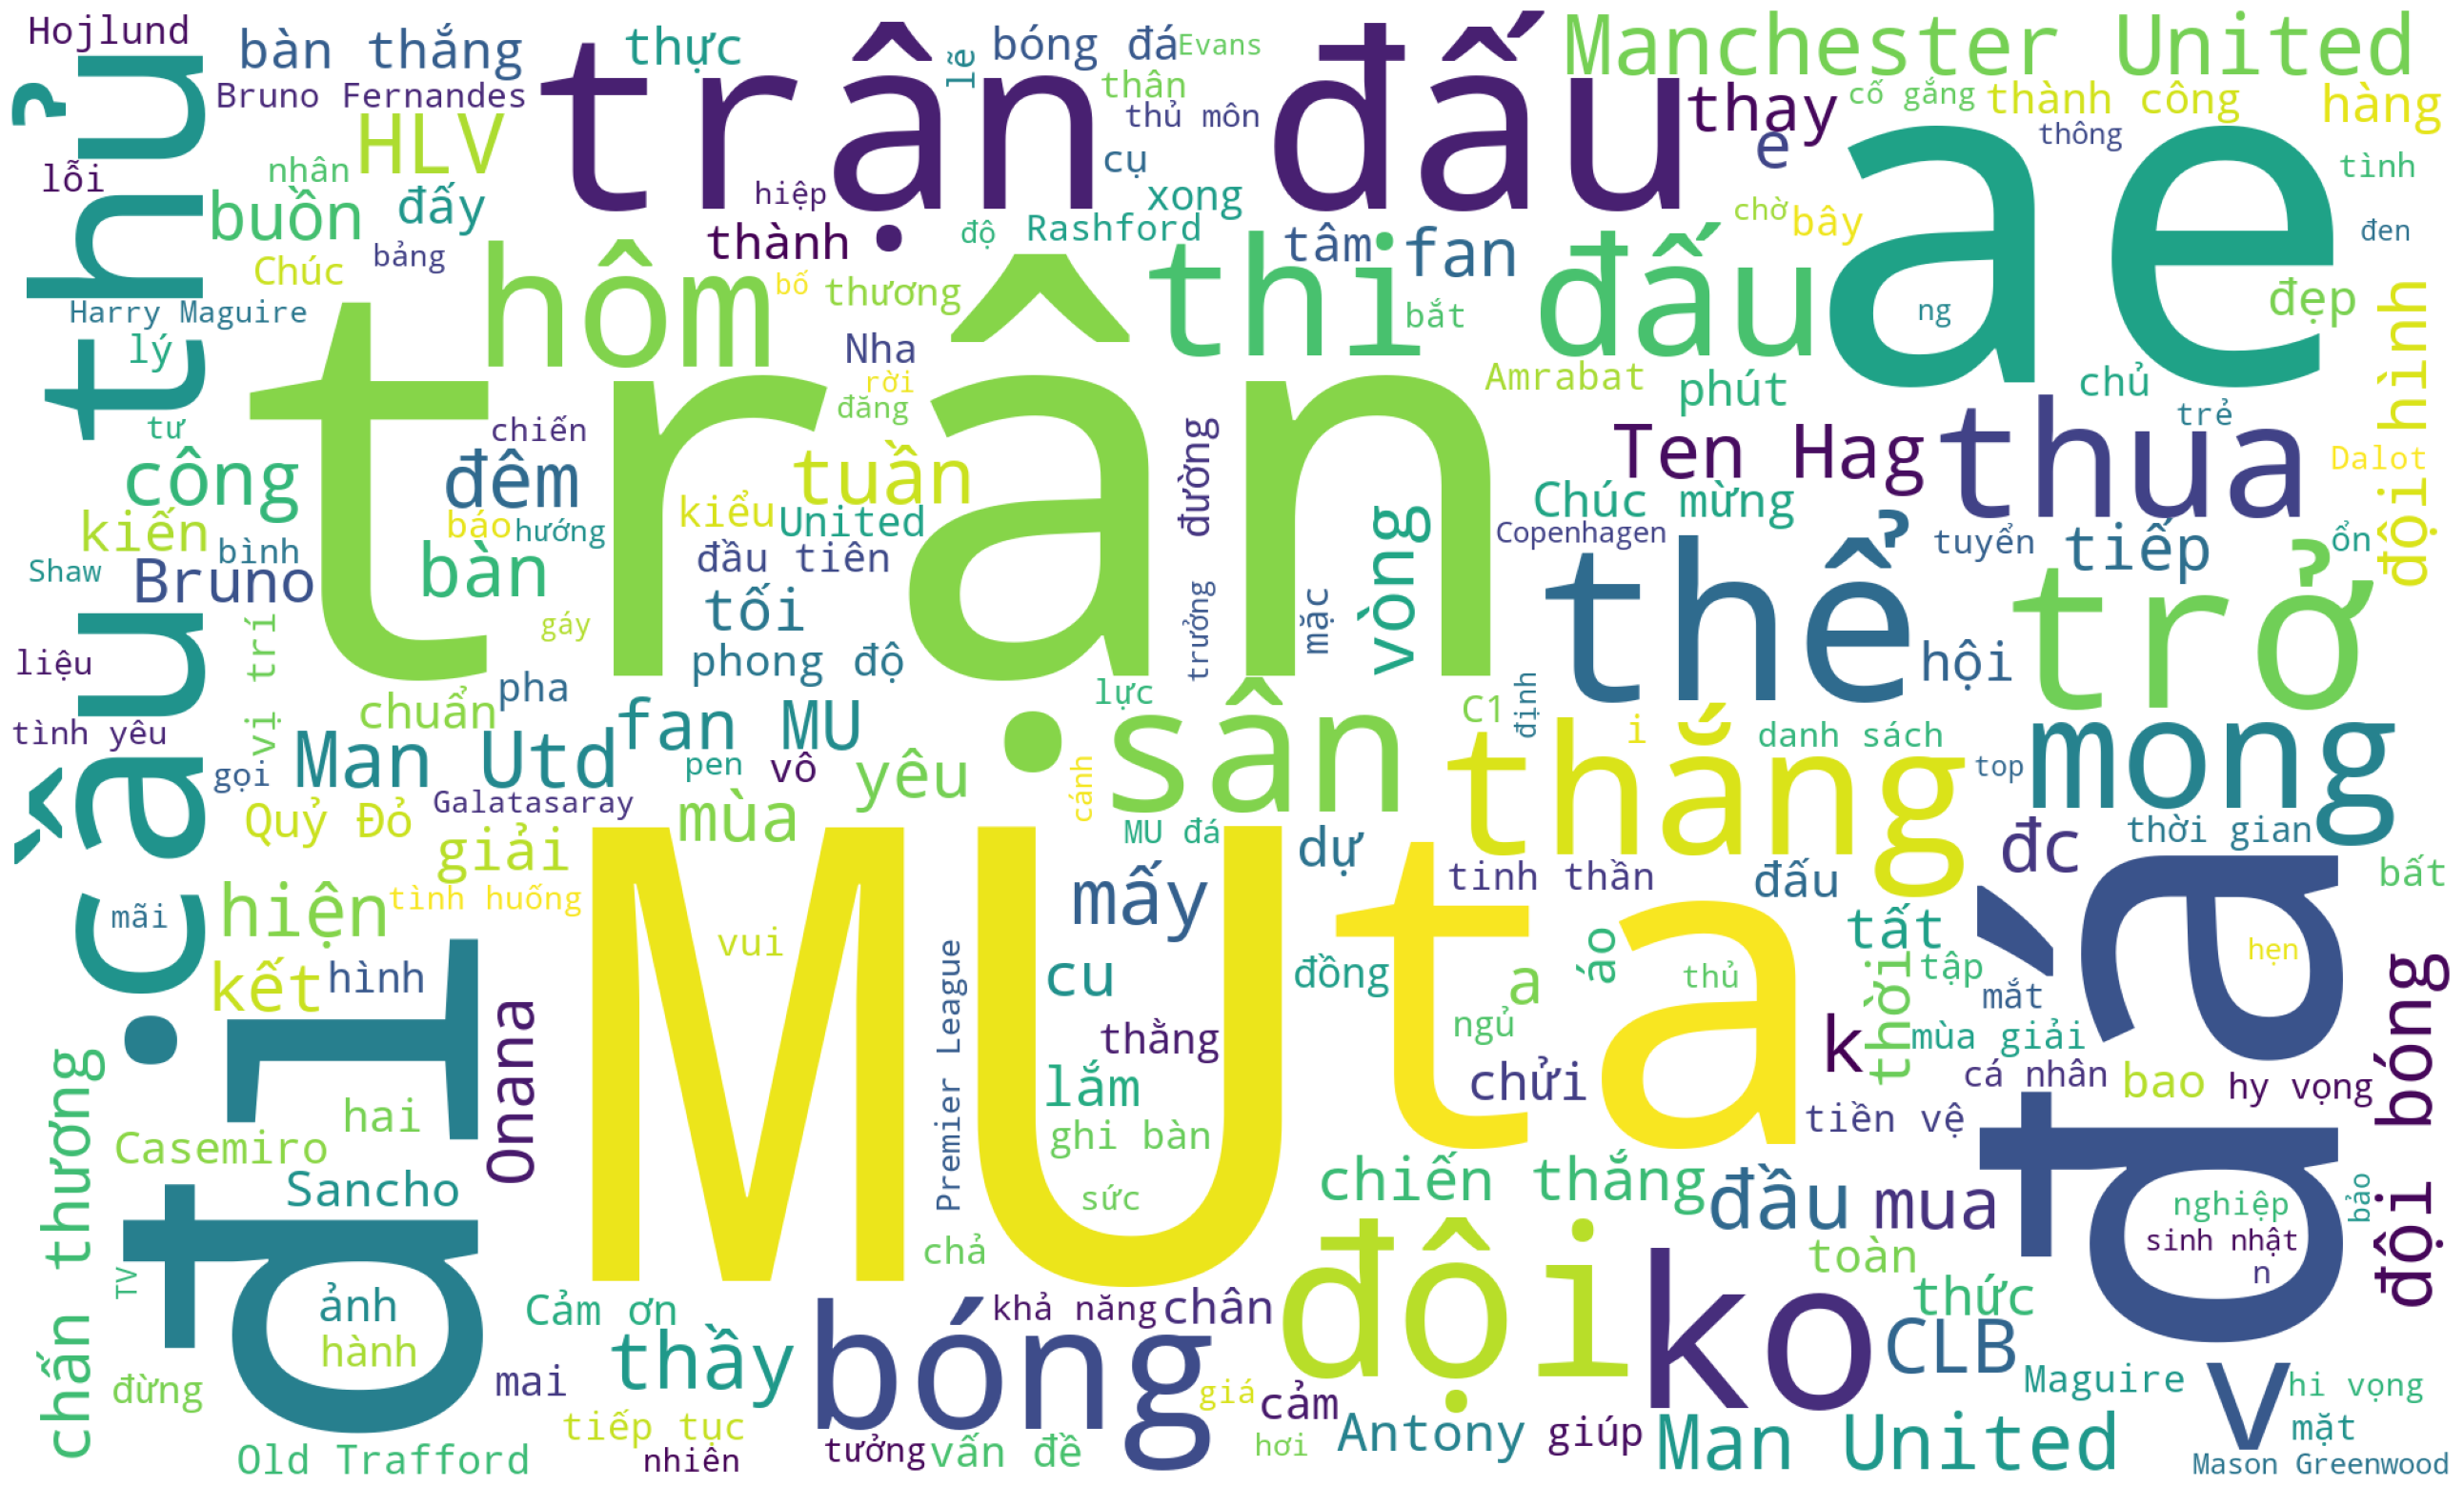

In [20]:
from wordcloud import WordCloud, STOPWORDS

stopwords_file_path = 'Data\model_data\\vietnamese-stopwords.txt'
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    vietnamese_stopwords = set(file.read().splitlines())

all_text_combined = ' '.join(df['text'].astype(str))

wordcloud_vietnamese = WordCloud(stopwords=vietnamese_stopwords,
                                 background_color='white',
                                 max_words=200,
                                 width=2000, height=1200,
                                 min_font_size= 6,
                                 ).generate(all_text_combined)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud_vietnamese)
plt.axis('off')

## **5. Sự tương quan giữa số lượng tương tác với các trường khác như số lượng bình luận, độ dài bài viết ?**

In [21]:
df['post_len'] = df['text'].str.len()

In [22]:
corr = df[['likes', 'comments', 'post_len']].corr()

In [23]:
corr

,likes,comments,post_len
likes,1.000000,0.417466,-0.021216
comments,0.417466,1.000000,0.050509
post_len,-0.021216,0.050509,1.000000


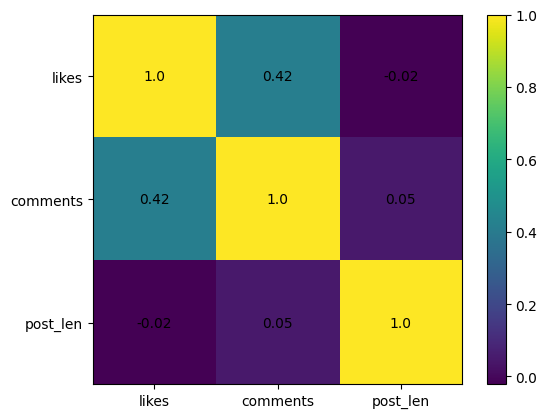

In [24]:
plt.imshow(corr, cmap= 'viridis')
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.annotate(str(round(corr.values[i, j], 2)), xy= (i , j), ha= 'center', va= 'center')
plt.colorbar()

## **6. Mức độ tương tác của nhóm thay đổi như thế nào khi các sự kiện xảy ra**

In [25]:
match_history = pd.read_csv('Data\mu_match_history.csv')

In [26]:
match_history.head()

,Date,Match,Result,Score,Competition
0,14 Aug 2023,Manchester United v Wolverhampton Wanderers,W,1-0,Premier League
1,19 Aug 2023,Tottenham Hotspur v Manchester United,L,2-0,Premier League
2,26 Aug 2023,Manchester United v Nottingham Forest,W,3-2,Premier League
3,03 Sep 2023,Arsenal v Manchester United,L,3-1,Premier League
4,16 Sep 2023,Manchester United v Brighton and Hove Albion,L,1-3,Premier League


In [27]:
match_history['Date'] = pd.to_datetime(match_history['Date']).astype(str)

In [28]:
match_history['short_description'] = match_history['Result'] + ' ' +  match_history['Score']

In [29]:
match_history.sort_values(by= 'Date')

,Date,Match,Result,Score,Competition,short_description
78,2021-08-14,Manchester United v Leeds United,W,5-1,Premier League,W 5-1
79,2021-08-22,Southampton v Manchester United,D,1-1,Premier League,D 1-1
80,2021-08-29,Wolverhampton Wanderers v Manchester United,W,0-1,Premier League,W 0-1
81,2021-09-11,Manchester United v Newcastle United,W,4-1,Premier League,W 4-1
82,2021-09-14,Young Boys Berne v Manchester United,L,2-1,UEFA Champions League,L 2-1
...,...,...,...,...,...,...
12,2023-10-24,Manchester United v FC Kobenhavn,W,1-0,UEFA Champions League,W 1-0
13,2023-10-29,Manchester United v Manchester City,L,0-3,Premier League,L 0-3
14,2023-11-01,Manchester United v Newcastle United,L,0-3,League Cup,L 0-3
15,2023-11-04,Fulham v Manchester United,W,0-1,Premier League,W 0-1


In [30]:
df['Date'] = df['time'].dt.to_period('d').astype(str)

In [31]:
total_interaction_per_day = df.groupby('Date')['total_interaction'].sum()


In [32]:
total_interaction_per_day.sort_index(ascending= True)

Date
2022-01-07      247
2022-03-12      730
2022-03-29      655
2022-04-20      786
2022-07-09      885
              ...  
2023-11-10     3249
2023-11-11     4431
2023-11-12    15569
2023-11-13     6240
2023-11-14      270
Name: total_interaction, Length: 147, dtype: int64

In [33]:
for i, row in match_history.iterrows():
    date = str(pd.to_datetime(row['Date']).to_period('D'))
    res = total_interaction_per_day.loc[date]
    print(date, ' ', res)
    if i == 5: break

2023-08-14   6039
2023-08-19   2304
2023-08-26   11353
2023-09-03   6342
2023-09-16   9338
2023-09-20   4835


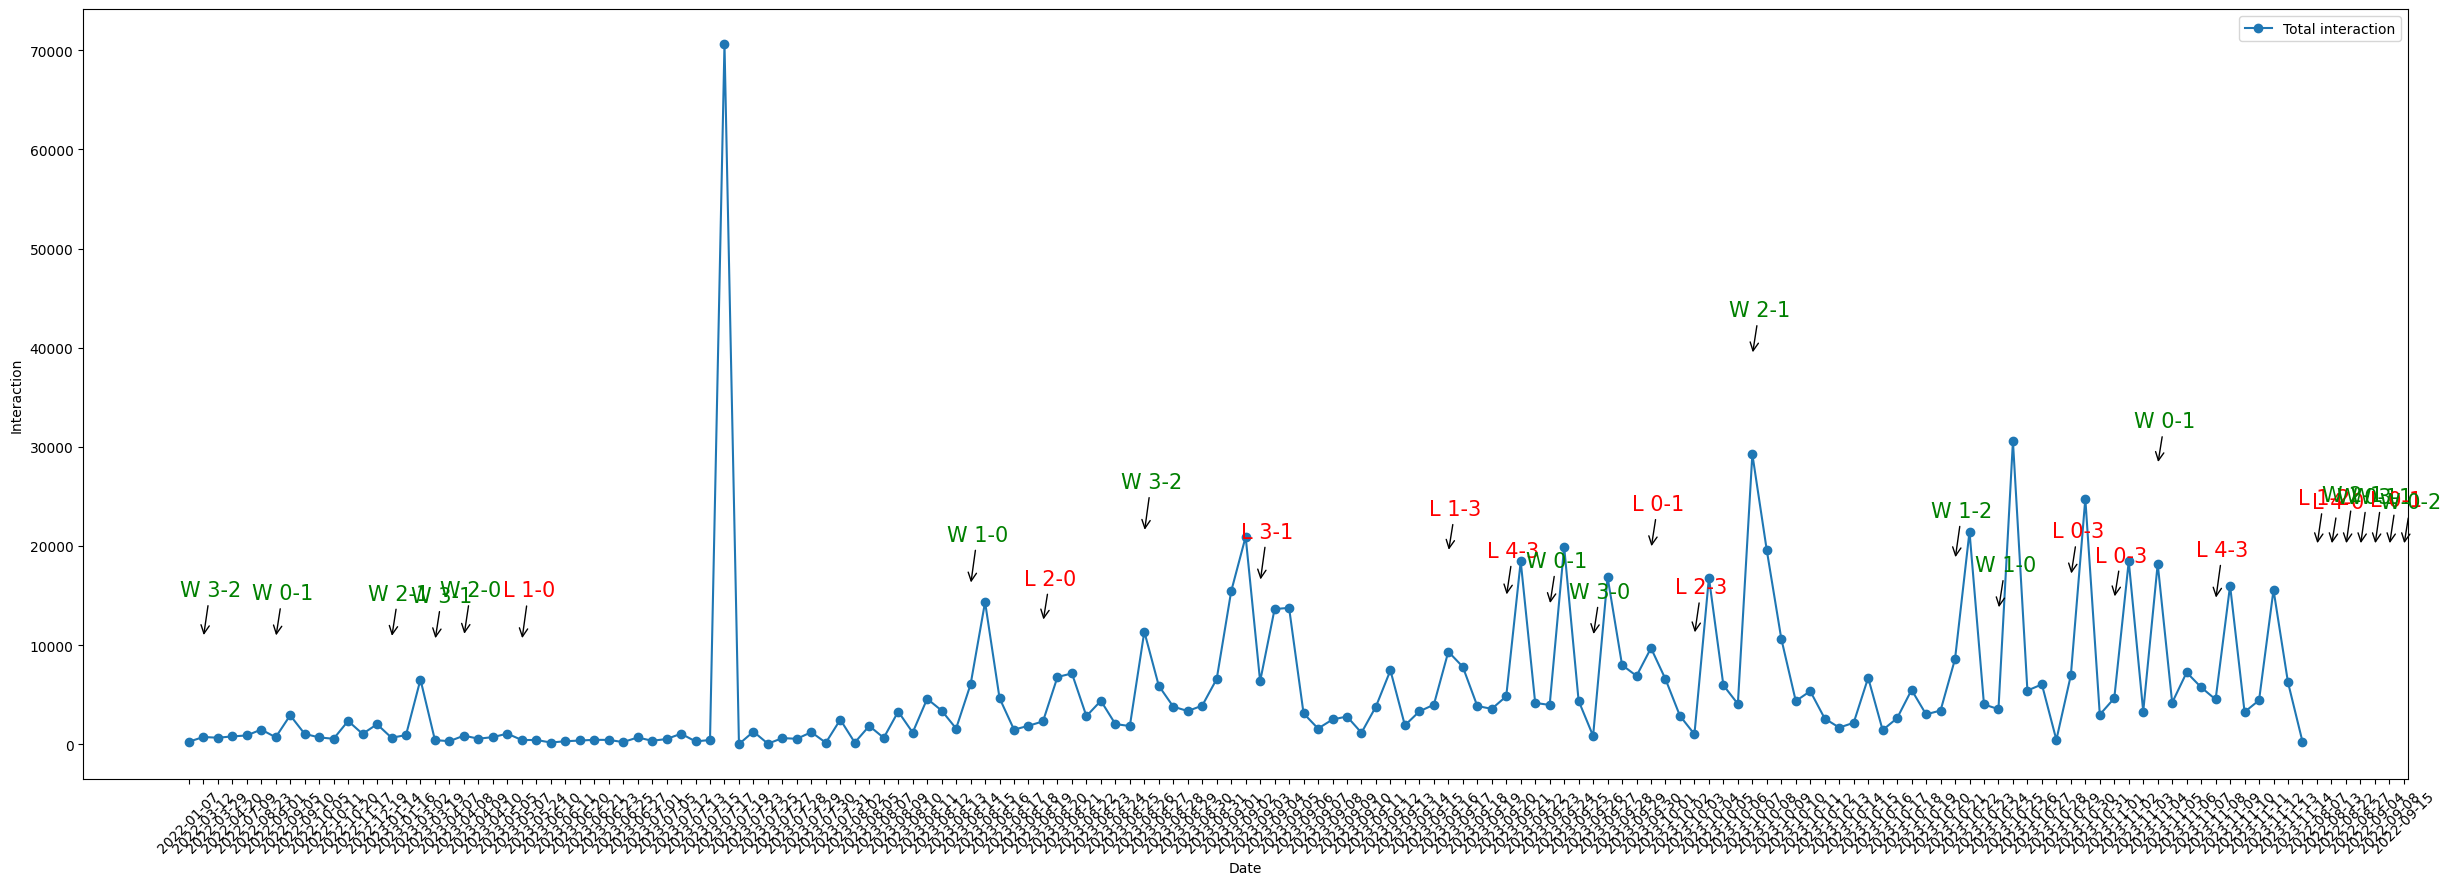

In [34]:
plt.figure(figsize= (30,10))
plt.plot(total_interaction_per_day, marker = 'o', label = 'Total interaction')
plt.xticks(rotation = 45)
#https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
for i, row in match_history.iterrows():
    date = str(pd.to_datetime(row['Date']).to_period('D'))
    
    try: 
        interaction = total_interaction_per_day.loc[date]
    except Exception:
        interaction = 10000
    plt.annotate(row['short_description'],
                xy=(date, interaction + 10000),
                xytext=(5, 30 + np.random.randint(-3, 3)),
                textcoords='offset points',
                ha='center',
                fontsize=15,
                color='red' if row['Result'] == 'L' else 'green',
                arrowprops=dict(arrowstyle= "->", connectionstyle="arc3"))
plt.ylabel('Interaction')
plt.xlabel('Date')
plt.legend()
plt.show()



## **7.Độ tích cực của nhóm có bị ảnh hưởng thế nào khi có sự kiện xảy ra?**

In [35]:
from model.sentiment_analysis_model import Sentiment_analysis_model

model = Sentiment_analysis_model()


In [36]:
data = df['text']

In [37]:
labels = model.predict(data)

48/48 [==============================] - 35s 723ms/step


In [38]:
labels

array([0, 2, 0, ..., 2, 0, 2], dtype=int64)

In [39]:
id_to_category = {0: 'NEG', 1: 'NEU', 2: 'POS'}

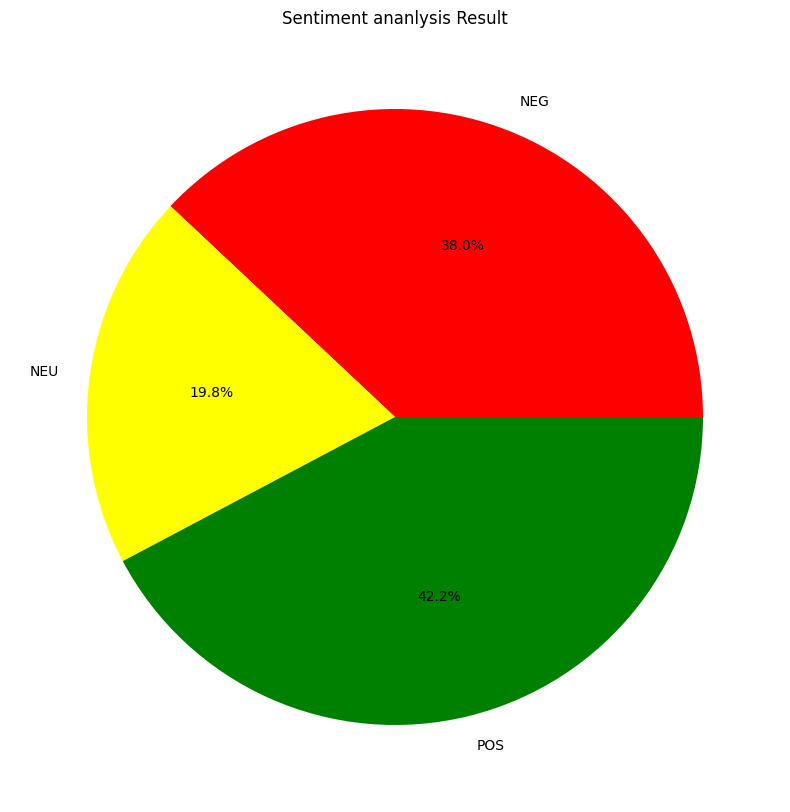

In [40]:
unique_values, counts = np.unique(labels, return_counts=True)
unique_values = [id_to_category[i] for i in unique_values]
colors = ['red', 'yellow', 'green']

plt.figure(figsize= (10, 10))
plt.pie(counts, labels=unique_values, colors=colors, autopct='%1.1f%%')

plt.title('Sentiment ananlysis Result')
plt.show()

In [41]:
df['Positively'] = labels

In [42]:
day_positivity = df.groupby('Date')['Positively'].mean()
average_positivity = df['Positively'].mean() * np.ones_like(df['Date'])


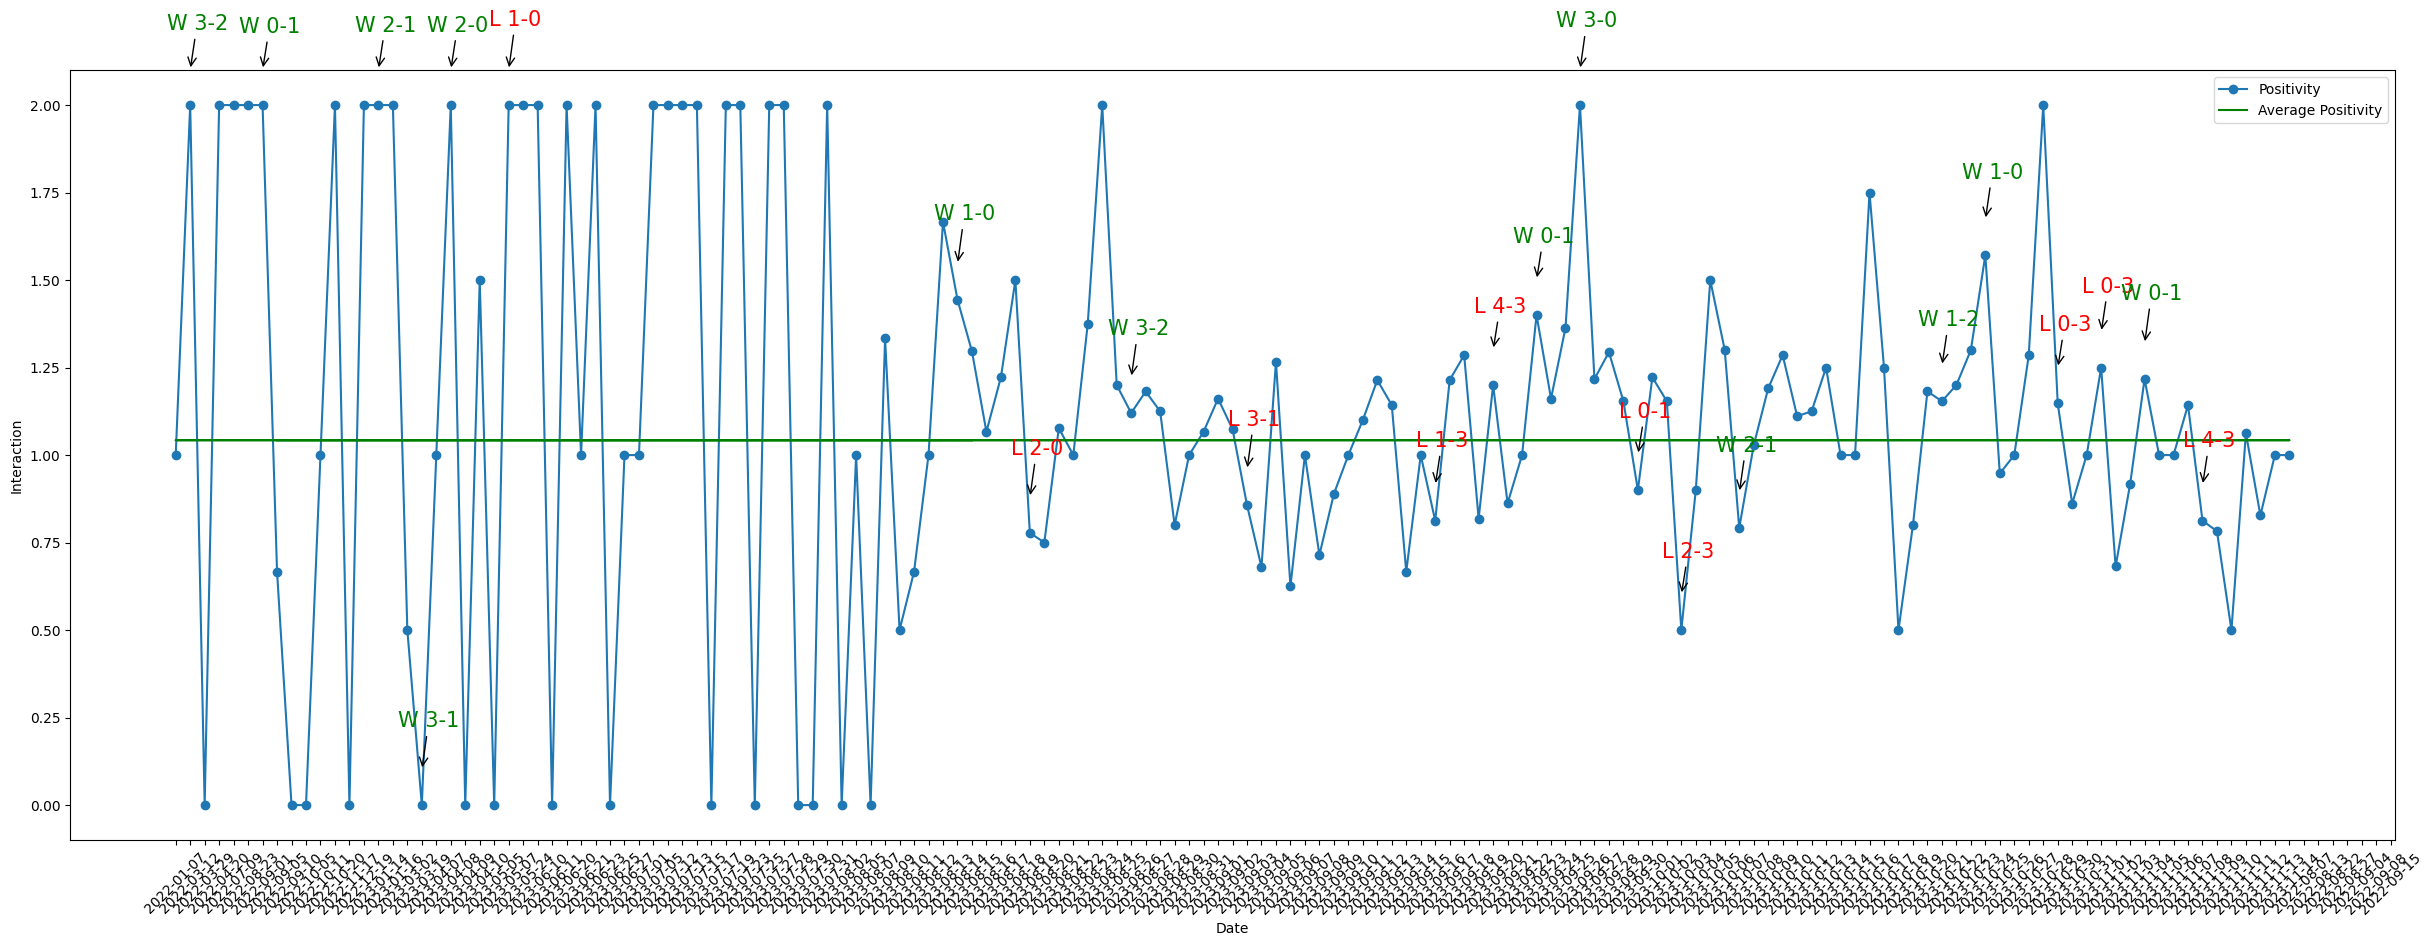

In [43]:
plt.figure(figsize= (30,10))
plt.plot(day_positivity , marker = 'o', label = 'Positivity')
plt.xticks(rotation = 45)
for i, row in match_history.iterrows():
    date = str(pd.to_datetime(row['Date']).to_period('D'))
    
    try: 
        positivity = day_positivity.loc[date]
    except Exception:
        positivity = 10000
    plt.annotate(row['short_description'],
                xy=(date, positivity + 0.1),
                xytext=(5, 30 + np.random.randint(-3, 3)),
                textcoords='offset points',
                ha='center',
                fontsize=15,
                color='red' if row['Result'] == 'L' else 'green',
                arrowprops=dict(arrowstyle= "->", connectionstyle="arc3"))
    
plt.plot(df['Date'], average_positivity, c= 'green', label= 'Average Positivity')
plt.ylabel('Interaction')
plt.xlabel('Date')
plt.legend()
plt.show()

## **8.Dự đoán số bài đăng trong vòng 3 ngày dựa trên kết quả trận đấu**

In [44]:
# try_df = pd.merge(df, match_history, how= 'left', left_on= 'Date', right_on= 'Date')

In [45]:

def get_3_nearest_day_num_of_posts(date: str)-> int:
    today = pd.to_datetime(date).to_period('D')

    tomorrow = str(today +  pd.Timedelta(days= 1))
    next_tomorrow = str(today + pd.Timedelta(days= 2))
    
    res = 0
    try: 
        res += df.groupby('Date').size().loc[date]
    except Exception:
        pass
        
    try: 
        res += df.groupby('Date').size().loc[tomorrow]
    except Exception:
        pass
    
    try: 
        res += df.groupby('Date').size().loc[next_tomorrow]
    except Exception:
        pass
    return res
    

def get_num_of_months_from_2022(date: str)-> int:
    today = pd.to_datetime(date)
    
    current_year = today.year
    current_month = today.month
    
    res = (current_year - 2022) * 12 + current_month
    
    return res
    
date = '2023-08-14'
print(get_3_nearest_day_num_of_posts(date))

51


In [46]:
match_history_data = match_history.copy()
match_history_data['Months_from_2022'] = match_history_data['Date'].apply(get_num_of_months_from_2022)

match_history_data['related_num_of_posts'] = match_history_data['Date'].apply(get_3_nearest_day_num_of_posts)


In [47]:
match_history_data = match_history_data.loc[match_history_data['Date'] >= '2022-01-01']

In [48]:
match_history_data.head()


,Date,Match,Result,Score,Competition,short_description,Months_from_2022,related_num_of_posts
0,2023-08-14,Manchester United v Wolverhampton Wanderers,W,1-0,Premier League,W 1-0,20,51
1,2023-08-19,Tottenham Hotspur v Manchester United,L,2-0,Premier League,L 2-0,20,42
2,2023-08-26,Manchester United v Nottingham Forest,W,3-2,Premier League,W 3-2,20,44
3,2023-09-03,Arsenal v Manchester United,L,3-1,Premier League,L 3-1,21,54
4,2023-09-16,Manchester United v Brighton and Hove Albion,L,1-3,Premier League,L 1-3,21,37


Text(0.5, 0, 'Result')

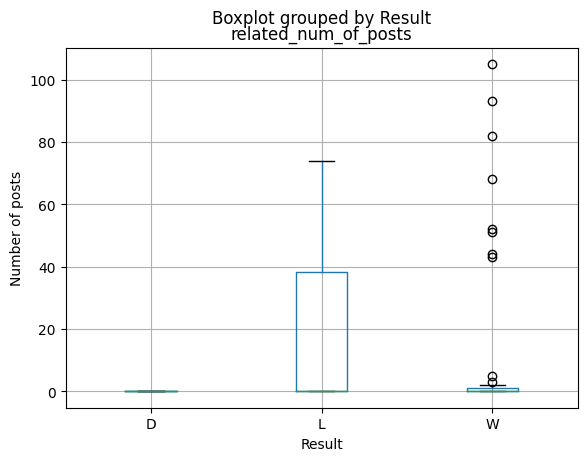

In [49]:
match_history_data[['Result', 'related_num_of_posts']].boxplot(by = 'Result')
plt.ylabel('Number of posts')
plt.xlabel('Result')

Text(0, 0.5, 'Number of posts')

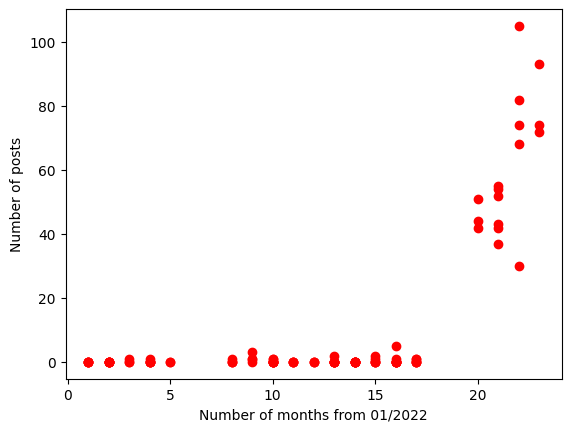

In [50]:
plt.scatter(match_history_data['Months_from_2022'], match_history_data['related_num_of_posts'], c = 'r')
plt.xlabel('Number of months from 01/2022')
plt.ylabel('Number of posts')

In [51]:
match_history.loc[match_history['Date'] == match_history['Date'].max()]

,Date,Match,Result,Score,Competition,short_description
16,2023-11-08,FC Kobenhavn v Manchester United,L,4-3,UEFA Champions League,L 4-3


In [52]:
def get_data(match_history_data: pd.DataFrame):
    '''
    input: dataframe
    progress:
    - convert result to one_hot vector
    - add months from 01/2022
    
    output: data (X) and label (y)
    '''
    X = []
    y = []
    for i, row in match_history_data.iterrows():
        data = []
        if row['Result'] == 'W':
            data.extend([1, 0, 0])
        elif row['Result'] == 'D':
            data.extend([0, 1, 0])
        else:
            data.extend([0, 0, 1])
        data.append(row['Months_from_2022'])
            
        X.append(data)
        y.append(row['related_num_of_posts'])
    return np.array(X), np.array(y)
        
X, y = get_data(match_history_data)


In [53]:
'''
meaning of each row index:
0: win
1: draw
2: lose
3: number of months from 01/2022
'''
X[0 : 5]


array([[ 1,  0,  0, 20],
       [ 0,  0,  1, 20],
       [ 1,  0,  0, 20],
       [ 0,  0,  1, 21],
       [ 0,  0,  1, 21]])

In [54]:
X.shape

(101, 4)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)


In [56]:
print('weight: {}'.format(model.coef_))
print('bias: {}'.format(model.intercept_))

weight: [-2.95751464 -0.18155948  3.13907412  2.14092169]
bias: -16.287068873227128


In [57]:
predictions = model.predict(X_test)
for x in range(len(predictions)):
    print(predictions[x], y_test[x])
    

36.09320402858684 72
-10.680896764338122 0
0.023711666826969235 0
2.164633353059987 1
-6.725229696073528 0
4.940588506691576 0
23.573850215390173 44
8.587398411759043 0
31.811360656120804 55
15.645196937856667 0
-4.584308009840511 0
-8.539975078105105 0
23.573850215390173 51
-2.1172100194060484 1
4.305555039293008 0
10.728320097992064 0
-11.007073068539565 0
8.587398411759043 2
10.728320097992064 0
-14.962740136804157 0
29.99661527408923 93


In [58]:
score = model.score(X_test, y_test)
print(f"Accuracy of the model: {score:.2f}")

Accuracy of the model: 0.50


In [59]:
data = np.array([[0, 0, 1, 24]])   #thua chelsea, 24 tháng kể từ tháng 1/2022
model.predict(data)


array([38.23412571])

### **Improve model**

In [60]:
def get_opponent(description: str)-> str:
    teams = description.split(' v ')
    if teams[0].strip() ==  "Manchester United":
        return teams[1].strip()
    else:
        return teams[0].strip()

In [61]:
des = 'FC Kobenhavn v Manchester United'
print(get_opponent(des))

FC Kobenhavn


In [62]:
match_history_data['Opponent'] = match_history_data['Match'].apply(get_opponent)

In [63]:
match_history_data.head()

,Date,Match,Result,Score,Competition,short_description,Months_from_2022,related_num_of_posts,Opponent
0,2023-08-14,Manchester United v Wolverhampton Wanderers,W,1-0,Premier League,W 1-0,20,51,Wolverhampton Wanderers
1,2023-08-19,Tottenham Hotspur v Manchester United,L,2-0,Premier League,L 2-0,20,42,Tottenham Hotspur
2,2023-08-26,Manchester United v Nottingham Forest,W,3-2,Premier League,W 3-2,20,44,Nottingham Forest
3,2023-09-03,Arsenal v Manchester United,L,3-1,Premier League,L 3-1,21,54,Arsenal
4,2023-09-16,Manchester United v Brighton and Hove Albion,L,1-3,Premier League,L 1-3,21,37,Brighton and Hove Albion


In [64]:
league = match_history_data['Competition'].unique()
league

array(['Premier League', 'UEFA Champions League', 'League Cup',
       'UEFA Europa League', 'FA Cup'], dtype=object)

In [65]:
teams = match_history_data['Opponent'].unique()
teams

array(['Wolverhampton Wanderers', 'Tottenham Hotspur',
       'Nottingham Forest', 'Arsenal', 'Brighton and Hove Albion',
       'Bayern Munchen', 'Burnley', 'Crystal Palace', 'Galatasaray',
       'Brentford', 'Sheffield United', 'FC Kobenhavn', 'Manchester City',
       'Newcastle United', 'Fulham', 'Liverpool', 'Southampton',
       'Leicester City', 'Real Sociedad', 'FC Sheriff Tiraspol',
       'Omonia Nicosia', 'Everton', 'Chelsea', 'West Ham United',
       'Aston Villa', 'AFC Bournemouth', 'Charlton Athletic', 'Reading',
       'Leeds United', 'Barcelona', 'Real Betis', 'Sevilla',
       'Middlesbrough', 'Atlético Madrid', 'Watford', 'Norwich City'],
      dtype=object)

In [66]:
ranking = [['Manchester City', 'Bayern Munchen', 'Liverpool', 'Chelsea', 'Tottenham Hotspur', 'Leicester City', 'Barcelona', 'Real Madrid'],
    ['Wolverhampton Wanderers', 'Arsenal', 'Atlético Madrid', 'Sevilla', 'Brighton and Hove Albion', 'Everton', 'Southampton', 'West Ham United'],
    ['Aston Villa', 'Newcastle United', 'Crystal Palace', 'Brentford', 'Sheffield United', 'Fulham', 'Real Sociedad', 'Nottingham Forest'],
    ['FC Kobenhavn', 'Galatasaray', 'FC Sheriff Tiraspol', 'Omonia Nicosia', 'AFC Bournemouth', 'Charlton Athletic', 'Leeds United']]
def foot_ball_team_rank(team: str)-> int:
    rank_index = 0
    for i in range(len(ranking)):
        if team in ranking[i]:
            rank_index = 5 - i
            break
    return rank_index if rank_index > 0 else 1

In [67]:
team = 'Wolverhampton Wanderers'
print(foot_ball_team_rank(team))

4


In [68]:
match_history_data['Opponent_rank'] = match_history_data['Opponent'].apply(foot_ball_team_rank)

In [69]:
match_history_data.head()

,Date,Match,Result,Score,Competition,short_description,Months_from_2022,related_num_of_posts,Opponent,Opponent_rank
0,2023-08-14,Manchester United v Wolverhampton Wanderers,W,1-0,Premier League,W 1-0,20,51,Wolverhampton Wanderers,4
1,2023-08-19,Tottenham Hotspur v Manchester United,L,2-0,Premier League,L 2-0,20,42,Tottenham Hotspur,5
2,2023-08-26,Manchester United v Nottingham Forest,W,3-2,Premier League,W 3-2,20,44,Nottingham Forest,3
3,2023-09-03,Arsenal v Manchester United,L,3-1,Premier League,L 3-1,21,54,Arsenal,4
4,2023-09-16,Manchester United v Brighton and Hove Albion,L,1-3,Premier League,L 1-3,21,37,Brighton and Hove Albion,4


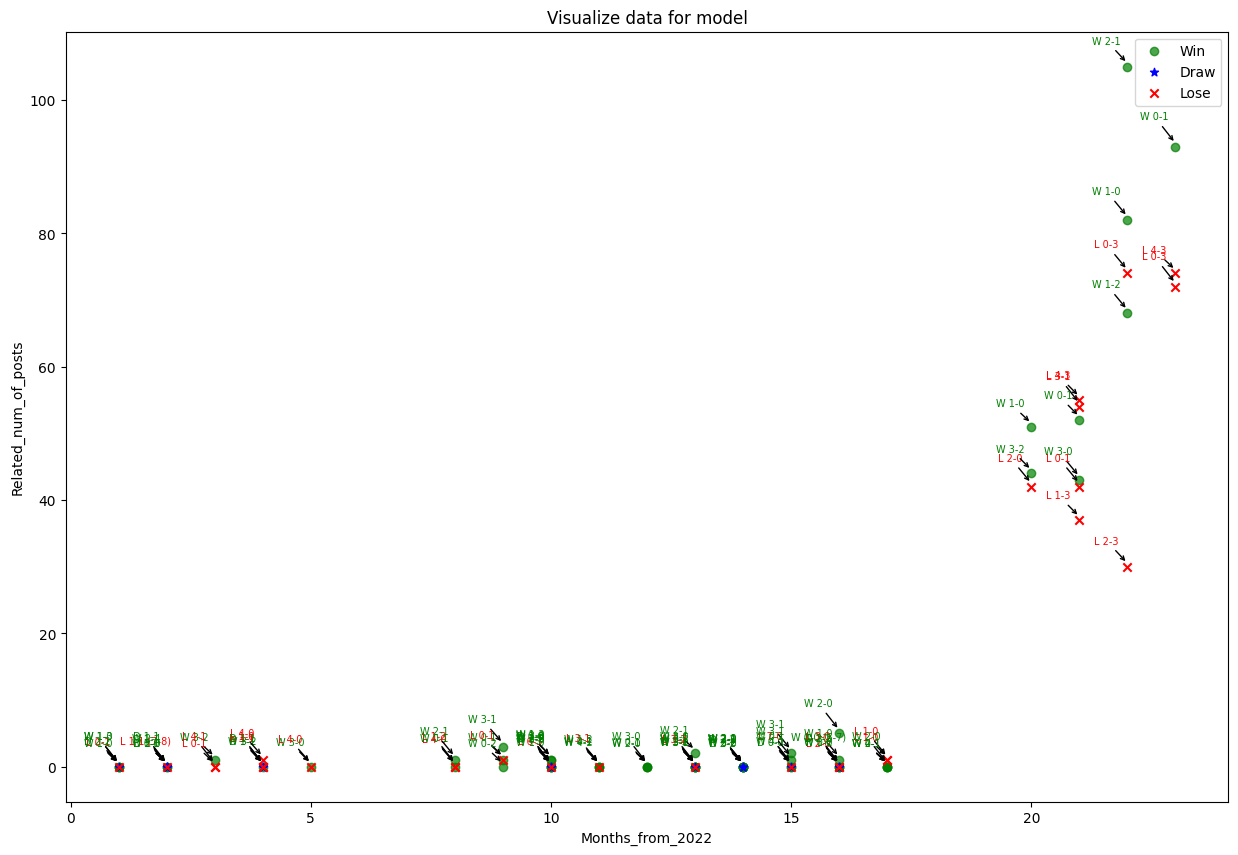

In [70]:
plt.figure(figsize= (15, 10))

win_subset = match_history_data.loc[match_history_data['Result'] == 'W']
plt.scatter(win_subset['Months_from_2022'], win_subset['related_num_of_posts'], c= 'green', label= 'Win', marker= 'o', alpha= 0.7)

draw_subset = match_history_data.loc[match_history_data['Result'] == 'D']
plt.scatter(draw_subset['Months_from_2022'], draw_subset['related_num_of_posts'], c= 'blue', label= 'Draw', marker= '*')

lose_subset = match_history_data.loc[match_history_data['Result'] == 'L']
plt.scatter(lose_subset['Months_from_2022'], lose_subset['related_num_of_posts'], c= 'red', label= 'Lose', marker= 'x')

for index, row in match_history_data.iterrows():
    plt.annotate(row['short_description'],
                xy=(row['Months_from_2022'], row['related_num_of_posts'] + 0.5),
                xytext=(-15, 15 + np.random.randint(-3, 3)),
                textcoords='offset points',
                ha='center',
                fontsize=7,
                color='red' if row['Result'] == 'L' else 'green',
                arrowprops=dict(arrowstyle= "->", connectionstyle="arc3"))

plt.xlabel('Months_from_2022')
plt.ylabel('Related_num_of_posts')
plt.title('Visualize data for model')
plt.legend()
plt.show()

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


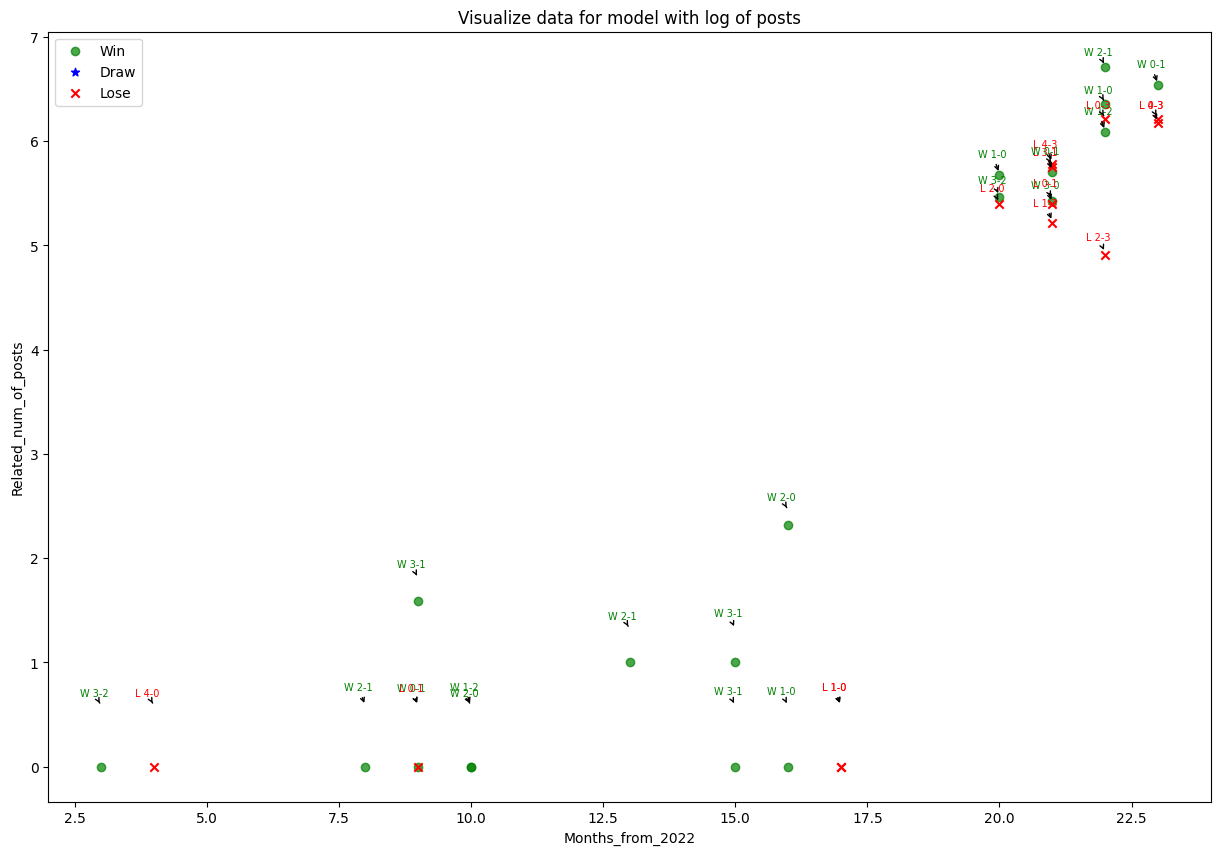

In [71]:
plt.figure(figsize= (15, 10))

plt.scatter(win_subset['Months_from_2022'], np.log2(win_subset['related_num_of_posts']), c= 'green', label= 'Win', marker= 'o', alpha= 0.7)
plt.scatter(draw_subset['Months_from_2022'],  np.log2(draw_subset['related_num_of_posts']), c= 'blue', label= 'Draw', marker= '*')
plt.scatter(lose_subset['Months_from_2022'],  np.log2(lose_subset['related_num_of_posts']), c= 'red', label= 'Lose', marker= 'x')

for index, row in match_history_data.iterrows():
    plt.annotate(row['short_description'],
                xy=(row['Months_from_2022'], np.log2(row['related_num_of_posts'] + 0.5)),
                xytext=(-5, 10 + np.random.randint(-3, 3)),
                textcoords='offset points',
                ha='center',
                fontsize=7,
                color='red' if row['Result'] == 'L' else 'green',
                arrowprops=dict(arrowstyle= "->", connectionstyle="arc3"))

plt.xlabel('Months_from_2022')
plt.ylabel('Related_num_of_posts')
plt.title('Visualize data for model with log of posts')
plt.legend()
plt.show()

In [72]:
def get_extend_data(match_history_data: pd.DataFrame):
    '''
    input: dataframe
    progress:
    - 2^(months from 01/2022 * 0.4)
    - add opponent rank
    - convert result to one_hot vector
    - add new features: opponent rank * result
    
    output: data (X) and label (y)
    '''
    X = []
    y = []
    for i, row in match_history_data.iterrows():
        data = []
        
        data.append(2**(row['Months_from_2022'] * 0.4))
        data.append(row['Opponent_rank'])
        if row['Result'] == 'W':
            data.extend([1, 0, 0])
            data.extend(data[1] * np.array([1, 0, 0]))
            
        elif row['Result'] == 'D':
            data.extend([0, 1, 0])
            data.extend(data[1] * np.array([0, 1, 0]))
            
        else:
            data.extend([0, 0, 1])
            data.extend(data[1] * np.array([0, 0, 1]))
            
            
        X.append(data)
        y.append(row['related_num_of_posts'])
    return np.array(X), np.array(y)
        
X, y = get_extend_data(match_history_data)

In [73]:
'''
meaning of row index:
0: months from 01/2022
1: rank of opponent team
2, 3, 4: result (win, draw, lose)
5, 6, 7: opponent rank * result'''
X[0: 5]

array([[256.        ,   4.        ,   1.        ,   0.        ,
          0.        ,   4.        ,   0.        ,   0.        ],
       [256.        ,   5.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   5.        ],
       [256.        ,   3.        ,   1.        ,   0.        ,
          0.        ,   3.        ,   0.        ,   0.        ],
       [337.79402516,   4.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   4.        ],
       [337.79402516,   4.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   4.        ]])

In [74]:
X.shape

(101, 8)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_plus = LinearRegression().fit(X_train, y_train)

In [82]:
print('weight: {}'.format(model_plus.coef_))
print('bias: {}'.format(model_plus.intercept_))

weight: [  0.16023559   1.77836547   7.83937013  12.97227091 -20.81164103
  -1.09168976  -2.69964567   5.56970091]
bias: -14.06756748880927


In [83]:
predictions = model_plus.predict(X_test)
predictions = np.array([max(0, i) for i in predictions])
for x in range(len(predictions)):
    print(predictions[x], y_test[x])

0.0 3
12.368184275212581 1
0.0 1
0.0 0
12.11620102486475 0
0.0 0
73.28163256543563 74
6.773583134988886 2
0.0 0
10.050161580025904 5
66.56566326746285 82
0.0 1
0.3484737726203786 0
0.0 0
14.373632758520198 0
0.0 0
9.363485875977442 1
0.9822872792603068 0
0.40305240145814203 0
15.06030846256866 0
81.40491750715599 72


In [84]:
type(predictions)

numpy.ndarray

In [85]:
score = model_plus.score(X_test, y_test)
print(f"Accuracy of the model: {score:.2f}")

Accuracy of the model: 0.87


In [86]:
data = np.array([[2**(24 * 0.4),  5,  0,  0,  1,  0,  0,  5]])   #thua chelsea, 24 tháng kể từ tháng 1/2022

model_plus.predict(data)

array([126.21145241])